#**Understanding How Doctors Judge: Analyzing Patient Characteristics to Predict Decision-Making**

Welcome to this Collab notebook, which contains the code and analysis for our main project of the degree.

The project involves a dataset of patient characteristics, with the ultimate goal of determining whether a patient has psychosis or neurosis. The scale ranges from 0 (psychosis) to 11 (neurosis). In addition to patient data, there are responses from 29 different doctors.

The project has three main goals:

1. Predict the decision of a specific doctor.
2. Predict the actual decision (psychosis or neurosis).
3. Understand how doctors make their decisions.

Throughout this notebook, you'll find code and analysis to help achieve these goals. I hope you find this project informative and useful, and I welcome any feedback or suggestions you may have.


## Data and Imports

Before we begin, we need to download the dataset we'll be working with. This can be done using the `gdown` command to download the files from Google Drive. The data set contains patient characteristics and responses from 29 different doctors, with the goal of predicting whether a patient has psychosis or neurosis.

In addition to downloading the data, we need to import several essential modules from the scikit-learn (sklearn) library. These modules include `RandomForestClassifier`, `LinearRegression`, `GridSearchCV`, `ParameterGrid`, `LogisticRegression`, and various modules for evaluating the performance of machine learning models (`accuracy_score`, `classification_report`, `confusion_matrix`, `mean_squared_error`). We also import the `warnings` module to handle warning messages that may arise during the execution of the code.

To ensure a clean output, we suppress warnings related to convergence, future warnings, and user warnings.


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.linear_model import LogisticRegression
from sklearn.exceptions import ConvergenceWarning
import xgboost as xgb
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

#Download data set
!gdown --id 1IFOqNcxAv4T7dYQCGCCESvyjlSilR3eA
!gdown --id 1K7ILW-ldSp8Su-cN3Rdlr4NsRA91Yotk

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1IFOqNcxAv4T7dYQCGCCESvyjlSilR3eA
To: /content/MEELMMPI.csv
100% 30.4k/30.4k [00:00<00:00, 78.5MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1K7ILW-ldSp8Su-cN3Rdlr4NsRA91Yotk
To: /content/MEELJUD.csv
100% 56.3k/56.3k [00:00<00:00, 69.1MB/s]


### Loading the Data

In this section, we load the two datasets we'll be working with: `MEELJUD.csv` and `MEELMMPI.csv`. The first dataset, `MEELJUD.csv`, contains responses from 29 different doctors, while the second dataset, `MEELMMPI.csv`, contains patient characteristics.

We begin by using the `read_csv()` function from the `pandas` module to read in the two datasets. We store the `MEELJUD.csv` dataset in a variable called `judeges`, and the `MEELMMPI.csv` dataset in a variable called `data`.

Next, we create a list of lists using the `iloc()` function to select all the values of each column in the `judeges` dataframe. This list will be used later for our analysis.


In [ ]:
from sklearn.preprocessing import MinMaxScaler
judeges = pd.read_csv('MEELJUD.csv')
data = pd.read_csv('MEELMMPI.csv')

data=data.drop(data.columns[-1],axis=1)
#Create a list of lists where each sub-list represents a column of the 'judeges' dataframe
#and contains all the values of that column
judges_list = [judeges.iloc[:, i].tolist() for i in range(len(judeges.columns))]

In [ ]:
import json
from google.colab import files
import os
def create_json_file(accuracy_score, r2_score, best_params, param_grid, cv, filename):
    data = {
        "Accuracy score": accuracy_score,
        "R2 Score": r2_score,
        "Best Parameters": best_params,
        "Parameter Grid": param_grid,
        "CV": cv
    }
   
    dir_name='resaults ML Judges'
    if not os.path.exists(dir_name):
        os.makedirs(dir_name)
    file_path = os.path.join(dir_name, filename)
    with open(file_path, "w") as outfile:
        json.dump(data, outfile)
        
    #files.download(filename)

## Optimizing Machine Learning Models with Grid Search and Hyperparameter Tuning:

In this part of the Colab notebook, we will be discussing three different functions for training and testing machine learning models: `run_linear_regression()`, `run_logistic_regression()`, `train_random_forest()`,and `run_xgboost()`.

The `run_linear_regression()` function creates a linear regression model, performs a grid search to find the best hyperparameters, and returns the best estimator. It also prints out the best hyperparameters, accuracy score, RMSE score, model coefficients, and intercept.

The `run_logistic_regression()` function creates a logistic regression classifier, performs a grid search to find the best hyperparameters, and returns the best estimator. It also prints out the best hyperparameters, accuracy score, classification report, and confusion matrix.

The `train_random_forest()` function initializes a Random Forest Classifier, performs a grid search to find the best hyperparameters, and returns the best estimator. It also prints out the best hyperparameters and accuracy.

The `run_xgboost()` function creates an XGBoost classifier, performs a grid search to find the best hyperparameters, and returns the best estimator. It also prints out the best hyperparameters, accuracy score, classification report, and confusion matrix.

These functions can be used to train and test machine learning models on a variety of datasets.


In [ ]:
def train_random_forest(X_train, y_train, X_test, y_test, param_grid, cv=5):

    clf = RandomForestClassifier()

    grid_search = GridSearchCV(clf, param_grid, cv=cv, verbose=1)
    grid_search.fit(X_train, y_train)

    best_estimator = grid_search.best_estimator_
    y_pred = best_estimator.predict(X_test)

    r2=r2_score(y_test,y_pred)

    print('r2_score is',r2 )
    acc = accuracy_score(y_test, y_pred)
    print("Best hyperparameters:", grid_search.best_params_)
    print("Accuracy:", acc)
    
    filename="random forest results cv="+cv
    create_json_file(acc,r2,grid_search.best_params_,param_grid,cv,filename)
    return best_estimator


In [ ]:
def run_logistic_regression(X_train, y_train, X_test, y_test, param_grid, cv=5):
    # Create a logistic regression classifier
    lr = LogisticRegression(random_state=42)
    
    # Perform grid search to find best hyperparameters
    grid_search = GridSearchCV(lr, param_grid, cv=cv, verbose=1)
    grid_search.fit(X_train, y_train)

    # Print best hyperparameters and accuracy score
    print("Best hyperparameters: ", grid_search.best_params_)
    print("Accuracy score: ", grid_search.best_score_)

    # Use best estimator to make predictions on test set
    y_pred = grid_search.best_estimator_.predict(X_test)
    r2=r2_score(y_test,y_pred)
    print('r2_score is',r2 )
    # Print classification report and confusion matrix
    from sklearn.metrics import classification_report, confusion_matrix
    print("Classification report:")
    print(classification_report(y_test, y_pred))
    print("Confusion matrix:")
    print(confusion_matrix(y_test, y_pred))

    # Return best estimator
    return grid_search.best_estimator_



In [ ]:
def run_linear_regression(X_train, y_train, X_test, y_test, param_grid, cv=5):
    # Create a linear regression model
    lr = LinearRegression()

    # Perform grid search to find best hyperparameters
    grid_search = GridSearchCV(lr, param_grid, cv=cv, n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)
 

    # Print best hyperparameters and RMSE score
    print("Best hyperparameters: ", grid_search.best_params_)
    print("Accuracy score: ", grid_search.best_score_)
    # Use best estimator to make predictions on test set
    y_pred = grid_search.best_estimator_.predict(X_test)
    r2=r2_score(y_test,y_pred)
    print('r2_score is',r2 )
    filename=f'linear regression results with cv={cv}'
    create_json_file(grid_search.best_score_,r2,grid_search.best_params_,param_grid,cv,filename)
    # Return best estimator
    return grid_search.best_estimator_

In [ ]:
def run_xgboost(X_train, y_train, X_test, y_test, param_grid, cv=5):
    # Create an XGBoost classifier
    xgb_model = xgb.XGBRegressor(random_state=42, objective='reg:squarederror')
    # Perform grid search to find best hyperparameters
    
    grid_search = GridSearchCV(xgb_model, param_grid, cv=cv, verbose=1)
    grid_search.fit(X_train, y_train)
    
    # Print best hyperparameters and accuracy score
    print("Best hyperparameters: ", grid_search.best_params_)
    print("Accuracy score: ", grid_search.best_score_)

    # Use best estimator to make predictions on test set
    y_pred = grid_search.best_estimator_.predict(X_test)
    r2=r2_score(y_test,y_pred)
    print('r2_score is',r2 )
    filename=f'XGBoost results with cv={cv}'
    create_json_file(grid_search.best_score_,r2,grid_search.best_params_,param_grid,cv,filename)
    # Return best estimator
    return grid_search.best_estimator_

## Splitting the data
Before running different classifiers, we first need to split our data into training and test sets. We can achieve this using the `train_test_split()` function from the `sklearn.model_selection` module. This function randomly splits the data and labels into two sets, one for training and one for testing. We typically use a larger portion of the data for training and a smaller portion for testing. 

In the code block, we set the `test_size` parameter to 0.2, which means we are allocating 20% of the data for testing and 80% for training. We also set the `random_state` parameter to 42 so that we get the same split every time we run the code. 

You can modify the code to split the data using any of the 29 judges in the judges_list variable. Simply replace `judges_list[1]` with `judges_list[0]` to `judges_list[28]` to use a different judge's rulings as the labels. Once we have our data split into training and test sets, we can use the training set to train our classifiers and then evaluate their performance on the test set. This helps us to ensure that our models are generalizing well and not just overfitting to the training data.


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data and labels into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data, judges_list[1], test_size=0.2, random_state=42)


In [ ]:
correlations=judeges.corr()
for col in correlations.columns:
    for row in correlations.index:
        value = correlations.loc[row, col]
        if abs(value) > 0.8 and value<1.0:
            print(f'{row} and {col}: {value}')
correlations_above_80 = correlations[correlations.abs() > 0.8]

#print(correlations_above_80)
#highest_correlations = correlations.abs().nlargest(1,'J2')
#(highest_correlations)

J16 and J6: 0.8025437254594842
J25 and J8: 0.8092008698991218
J21 and J11: 0.8171830197413981
J25 and J11: 0.8277400566295721
J6 and J16: 0.8025437254594842
J28 and J18: 0.8179554858551689
J11 and J21: 0.8171830197413981
J25 and J21: 0.8207878616056531
J8 and J25: 0.8092008698991218
J11 and J25: 0.8277400566295721
J21 and J25: 0.8207878616056531
J18 and J28: 0.8179554858551689



J6 and J16: 0.8025437254594842
J11 and J21: 0.8171830197413981<-
J8 and J25: 0.8092008698991218      j8 is semi correlate with that group
J11 and J25: 0.8277400566295721:<-
J21 and J25: 0.8207878616056531<-
J18 and J28: 0.8179554858551689  j18 and j28 correlate alone

we clearly can see j11 j21 and j25



##here is the judges correlations table for clustering
##we took only correlations above 80

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [52.5, 52.5, 82.5, 82.5],
  [125.0, 125.0, 135.0, 135.0],
  [115.0, 115.0, 130.0, 130.0],
  [105.0, 105.0, 122.5, 122.5],
  [175.0, 175.0, 185.0, 185.0],
  [165.0, 165.0, 180.0, 180.0],
  [155.0, 155.0, 172.5, 172.5],
  [145.0, 145.0, 163.75, 163.75],
  [113.75, 113.75, 154.375, 154.375],
  [67.5, 67.5, 134.0625, 134.0625],
  [22.5, 22.5, 100.78125, 100.78125],
  [215.0, 215.0, 225.0, 225.0],
  [205.0, 205.0, 220.0, 220.0],
  [245.0, 245.0, 255.0, 255.0],
  [235.0, 235.0, 250.0, 250.0],
  [285.0, 285.0, 295.0, 295.0],
  [275.0, 275.0, 290.0, 290.0],
  [265.0, 265.0, 282.5, 282.5],
  [242.5, 242.5, 273.75, 273.75],
  [212.5, 212.5, 258.125, 258.125],
  [195.0, 195.0, 235.3125, 235.3125],
  [61.640625, 61.640625, 215.15625, 215.15625],
  [5.0, 5.0, 138.3984375, 138.3984375]],
 'dcoord': [[0.0, 0.559715888986517

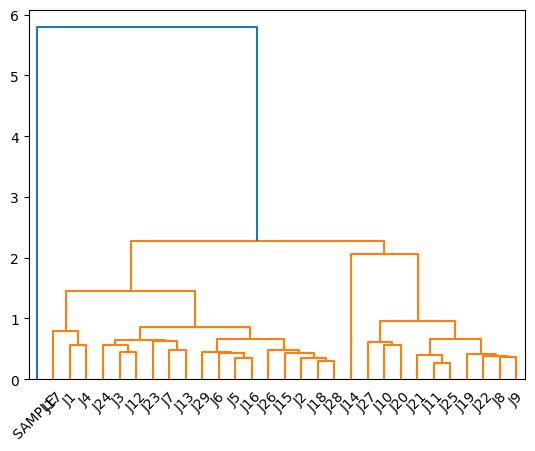

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
# select the columns to cluster
cols_to_cluster = [f'j{i}' for i in range(1, 29)]

# calculate the linkage matrix
Z = linkage(judeges.corr(), method='ward')

# plot the dendrogram here we trying to cluster groups of judges
dendrogram(Z, labels=judeges.columns)

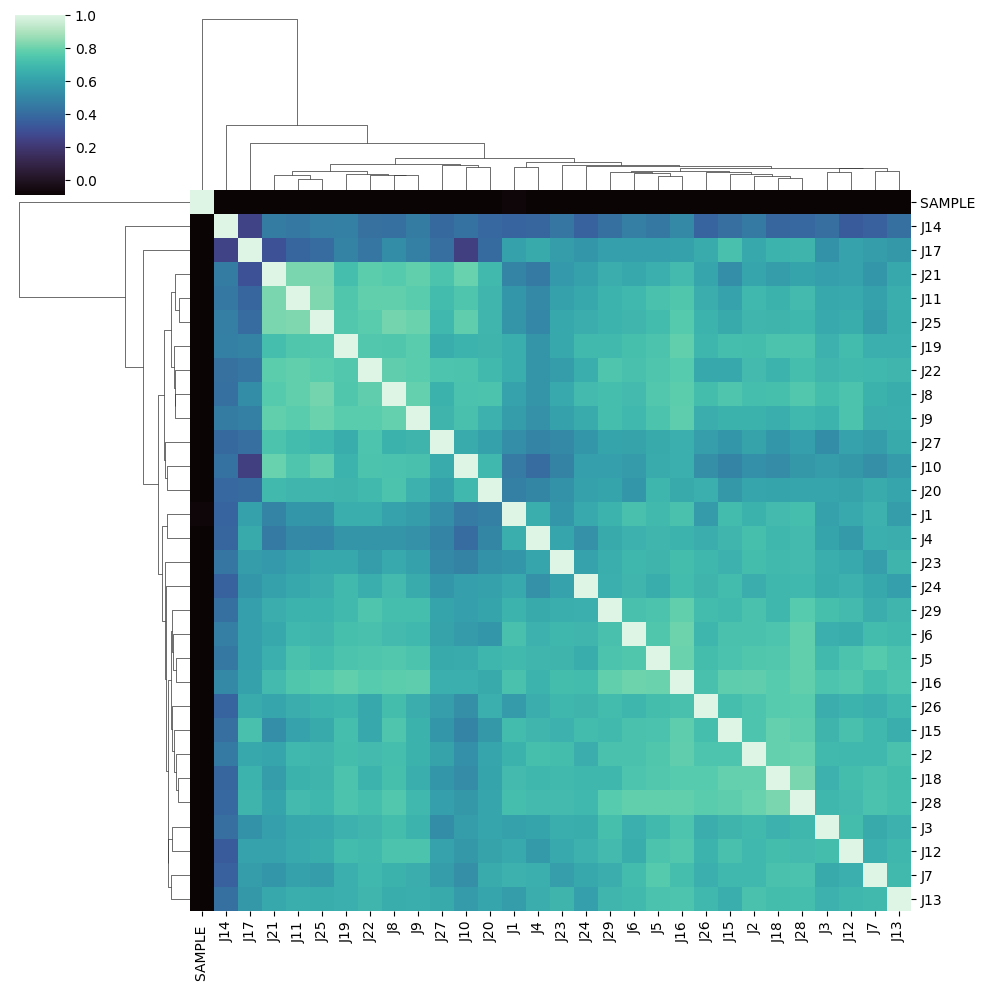

In [ ]:
import seaborn as sns

sns.clustermap(judeges.corr(), cmap="mako")


IndexError: ignored

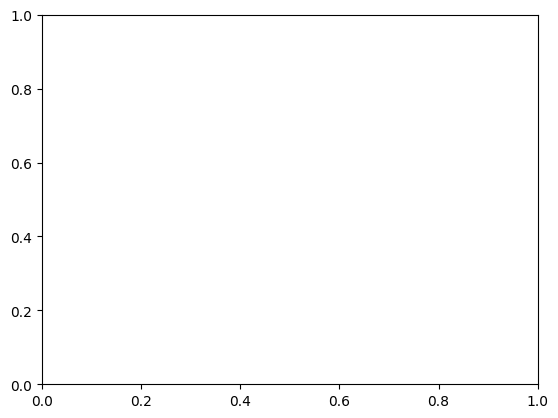

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca.fit(judeges.values)

fig, ax = plt.subplots()
for i, cluster in enumerate(set(Z[:, 3])):
    idx = (Z[:, 3] == cluster)
    ax.scatter(pca.components_[0, idx], pca.components_[1, idx], label=f'Cluster {i}')
ax.legend()
plt.show()


In [ ]:
from pandas.plotting import parallel_coordinates

judeges['cluster'] = pd.Series(Z[:, 3]).astype(int).astype(str)

parallel_coordinates(judeges, 'cluster', color=['red', 'green', 'blue'])


In [ ]:
###idea:here we check few regressors without touching the hyperparameters to have intuition about models to explore
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

def find_best_regressor(X, y, cv=5):
    # Define a list of regressor models to try
    regressors = [
        SVR(),
        xgb.XGBRegressor(random_state=42, objective='reg:squarederror'),
        LinearRegression(),
        DecisionTreeRegressor(),
        RandomForestRegressor()
    ]
    
    # Define a dictionary to store the cross-validation scores for each model
    scores = {}
    
    # Iterate over each regressor model and compute its cross-validation score
    for regressor in regressors:
        score = cross_val_score(regressor, X, y, cv=cv).mean()
        scores[regressor.__class__.__name__] = score

    # Return the regressor with the highest cross-validation score
    print(scores)
    return max(scores, key=scores.get)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

## Hyperparameter Tuning with Grid Search

Hyperparameter tuning is an important step in building machine learning models. It involves finding the optimal combination of hyperparameters that can best fit the data and produce accurate predictions. One common approach to hyperparameter tuning is grid search, which involves systematically testing different combinations of hyperparameters and evaluating their performance.

In this section, we'll be using grid search to optimize the performance of three machine learning models: random forest classifier, logistic regression classifier, and linear regression model. We will define different parameter grids for each model and use the `GridSearchCV` function from scikit-learn to perform the grid search. Finally, we will evaluate the performance of the optimized models on the test set.


In [ ]:
cv_list=range(4,10)

In [ ]:
linear_param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'n_jobs': [-1, None, 2],
    'positive': [True, False],
    
}
for cv in cv_list:
  print("RUN ON CV ",cv)
  linear_best_estimator = run_linear_regression(X_train, y_train, X_test, y_test, linear_param_grid ,cv=cv)


XGBOOST chat gpt summury 

learning_rate: Controls the step size shrinkage used in each boosting iteration. A smaller learning rate typically results in a more accurate model, but requires more boosting iterations.

max_depth: Controls the maximum depth of the tree. A deeper tree can capture more complex relationships in the data, but can also lead to overfitting.

min_child_weight: Controls the minimum sum of instance weight needed in a child. A higher value of min_child_weight can help reduce overfitting.

subsample: Controls the fraction of the training data used in each boosting iteration. A lower value of subsample can help reduce overfitting.

colsample_bytree: Controls the fraction of features used in each boosting iteration. A lower value of colsample_bytree can help reduce overfitting.

gamma: Controls the minimum loss reduction required to split a node. A higher value of gamma can help reduce overfitting.

alpha: Controls L1 regularization on the leaf weights. A higher value of alpha can help reduce overfitting.

lambda: Controls L2 regularization on the leaf weights. A higher value of lambda can help reduce overfitting.

scale_pos_weight: Controls the balance of positive and negative weights in the training data. A higher value of scale_pos_weight can help improve model performance when the data is imbalanced.



In [ ]:



XGBoost_param_grid = {
        'learning_rate': [0.1],
        'min_child_weight': [10],
        'gamma': [ 5],
        'subsample': [ 1.0],
        'colsample_bytree': [0.8 ],
        'max_depth': [ 11 ]
        }




# run XGBoost with the modified target variables
#for cv in cv_list:
XGBoost_best_estimator = run_xgboost(X_train, y_train, X_test, y_test, XGBoost_param_grid,cv=5)

tryng smote to enrich the data set for train
its looks like it dosnt help need to operate it better
r_2 score dosnt improve accuracy not logical (negative)

In [ ]:

import resreg
import smogn 

#smoter section
# Create an instance of the SMOTER oversampler
relevance = resreg.sigmoid_relevance(y_train, cl=None, ch=np.percentile(y_train, 90))
X_smoter, y_smoter = resreg.smoter(
X_train, y_train,
k=5,
over="balance",
relevance=relevance,
under=0.33,
random_state=0,
nominal=None)



In [ ]:
!pip install resreg
!pip install smogn

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 10))
xgb.plot_tree(XGBoost_best_estimator, num_trees=75, ax=ax)
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Plot feature importance
fig, ax = plt.subplots(figsize=(10, 8))
xgb.plot_importance(XGBoost_best_estimator, ax=ax)
plt.show()


In [ ]:
import sklearn
from sklearn import inspection
import shap
#from sklearn.inspection import plot_partial_dependence

# Select the features to create PDP plots for
features = ['S1', 'S2']

# Plot partial dependence for the selected features
fig, ax = plt.subplots(figsize=(10, 8))
shap.plots.partial_dependence(XGBoost_best_estimator, X_train, features, ax=ax)
plt.show()


In [ ]:
from imblearn.over_sampling import SMOTE

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error




# Create an instance of the SMOTER oversampler
smote=SMOTE()


# Apply SMOTER to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train a linear regression model on the resampled data
#lr = LinearRegression()
#lr.fit(X_train_resampled, y_train_resampled)
XGBoost_best_estimator = run_xgboost(X_train_resampled, y_train_resampled, X_test, y_test, XGBoost_param_grid,cv=5)

# Make predictions on the test data
y_pred = lr.predict(X_test)


# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean squared error: {mse:.2f}")


In [ ]:
pip install imbalanced-learn==0.7.0



#here we use support vector regression model

```
# This is formatted as code
```
Support Vector Regression: This is a model that tries to find a hyperplane that separates the inputs into different classes based on their values. It can be effective for small to medium-sized datasets, and can handle non-linear relationships with the use of kernel functions.


hyper parameters:
kernel: The type of kernel function to use in the SVM. Some popular options are 'linear', 'poly', and 'rbf'.

C: The regularization parameter. Larger values of C will result in a smaller margin and allow for more misclassifications, while smaller values of C will result in a larger margin and fewer misclassifications.

gamma: The kernel coefficient for 'rbf', 'poly', and 'sigmoid' kernels. This parameter controls the shape of the decision boundary. Larger values of gamma will result in a more complex decision boundary, while smaller values of gamma will result in a simpler decision boundary.

degree: The degree of the polynomial kernel function (for 'poly' kernel).



In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
param_grid = {
    'kernel': [  'rbf'],
    'C': [1e3,0.1, 1, 10],
    'gamma': ['scale', 'auto', 0.1, 1],
    'degree': [2, 3, 4]
}
svr=SVR()
#best_params = find_best_params(X_train, y_train, param_grid)
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=5, n_jobs=-1)

# fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

print('accuracy is ',grid_search.best_score_)
print('best params is ',grid_search.best_params_)

In [ ]:
ypred=grid_search.predict(X_test)
r_2=r2_score(y_test,ypred)
print('r2 score: ',r_2)

In [ ]:

import shap
explainer = shap.TreeExplainer(XGBoost_best_estimator)
shap_values = explainer.shap_values(X_train)
for i in range (0,11):
  shap.dependence_plot(i, shap_values, X_train.values, feature_names=X_train.columns)

In [ ]:
booster = XGBoost_best_estimator.get_booster()

# Extract the tree structure as a DataFrame
trees = booster.trees_to_dataframe()

# Print the tree structure and their values
for i in range(XGBoost_best_estimator.n_estimators):
    tree = trees[trees['Tree'] == i]
    print(f"Tree {i}:\n{tree[['Feature', 'Split', 'Yes', 'No']].to_string(index=False)}\n")

In [ ]:
importance = XGBoost_best_estimator.get_score(importance_type='weight')

# Print a table of the feature importance scores
print('Feature\t\tWeight')
for feat, weight in sorted(importance.items(), key=lambda x: x[1], reverse=True):
    print('{}\t\t{}'.format(feat, weight))

In [ ]:
xgb.plot_tree(XGBoost_best_estimator, num_trees=3, rankdir='LR')

In [ ]:
random_forest_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}
for cv in cv_list:
  print("RUN ON CV ",cv)
  random_forest_best_estimator = train_random_forest(X_train, y_train, X_test, y_test, random_forest_param_grid,cv=cv)
  

This part of the code computes the training and test errors for each of the three models used in the analysis. The training error is the error rate of the model on the data used to train it, while the test error is the error rate on data that the model has not been trained on.

For the random forest and logistic regression models, accuracy is used to measure error rate. The mean squared error is used to measure error rate for the linear regression model.


##TODO list: 20.3.23

* open up class that do all the work for a better readable code. in all of us meeting


all missions 1-3 to next meeting !!!!.
------------------------------------------------------
* after all above done trying to see how it works on other judges .

* make our on cluster method(find groups of simmilar patient (maybe later groups of simillar judges) .

* create universal judge hope to be better than all others .

* george hipothesis - see the difference between judges test values by the difference of thier decision trees(as much as the test is higher in the tree hyrarchy is more valuable).
 
tasks performed:
------------------------------------------------------
transform the data after understanding the meaning of the resaults(will be in the above class) .   
* **tryed with no succses** (we tried to normalize the data set with no prediction improve)

keep investigate all hyper parameters meaning and improve regressors accuracy  
*  **we saw that the hyperparamters values changing between judges**  
 **best result above**

visualize the paramters of each model that we trained  
* **We ploted the models trees, SHAP values, feature importance**

## Best results for judge 1 
* Best hyperparameters:  {'colsample_bytree': 0.8, 'gamma': 5, 'learning_rate': 0.1, 'max_depth': 11, 'min_child_weight': 10, 'subsample': 1.0}  
* Accuracy score:  0.7019679695173962  
* r2_score : 0.7858427941966044


## Tree model
Our goal is to train a model for the decisions of every doctor. We'll start by creating decision trees for each doctor. To measure the differences between two doctors' models, we'll use one of two methods:

\begin{itemize}
    \item Option 1: involves representing each leaf node in a decision tree as the intersection of multiple half-planes. That is, each condition in the decision tree is a half-plane, and when we traverse along a root-to-leaf node of the decision tree we identify the intersection of all the half-planes. In other words, every leaf node of the decision tree represents a ``cell'' in the input space, and all the points in this cell get the same answer of either neurotic or psychotic by the model of the doctor. To measure the difference between two doctors, we compute the area of where the two models disagree. 

    \item Option 2: involves scanning the decision trees using a pre-order, in-order, or post-order traversal to obtain a string representation for each tree. To measure the distance between two trees, compute edit-distance between the two representative strings. 
\end{itemize}

Hence, our first step is to train a decision tree model for every doctor. 

Next, to measure the distances between different models, we can present the distances as a confusion matrix. In position $(i,j)$ of the confusion matrix we write the distance $d(i,j)$ between model of doctor $i$ and the model of doctor $j$ with one of the distance measurements that we described above. We can display the confusion matrix in a colorful way as a heatmap to better visualize the differences and similarities.

Finally, we can try to use all the decision trees to create a ``super''-doctor model where we divide the plane according to all trees, and in each cell the decision of whether this cell is neurotic or psychotic is chosen by taking a majority voting according to all the single-doctor models. This forms some sort of an ensemble model that represents the super-doctor. 


## Other questions that may be interesting:

\begin{itemize}
\item Improve the XGBoost prediction by a more sophisticated tuning of the hyper-parameters.

\item Learn on a group of judges and test on other judges. This experiment aims to evaluate the generalizability of the learned models across different judges and to identify whether certain judges have more consistent or accurate decision-making processes than others.

\item Learn on all judges and compare the predictions to the absolute results. This experiment aims to assess the overall accuracy of the learned models and to identify which patient characteristics have the most significant impact on decision-making.

\item Cluster similar judges and investigate whether they have common characteristics or decision-making processes. This experiment aims to identify patterns in decision-making and to provide insights into the factors that influence judgments.
\end{itemize}

To accomplish these tasks, we will utilize the previously developed functions and apply them to the Meehl's dataset on clinical judgment. Our methodology will involve training and testing machine learning models using the different learning methods mentioned above. We will use cross-validation techniques to evaluate the performance of the models and determine the best method for predicting patient characteristics and decision-making outcomes.


## Things we tried


In [ ]:
def load_the_data():
    from sklearn.preprocessing import MinMaxScaler
    judeges = pd.read_csv('MEELJUD.csv')
    data = pd.read_csv('MEELMMPI.csv')

    judeges=judeges.drop(judeges.columns[-1],axis=1)
    data=data.drop(data.columns[-1],axis=1)
    
    #Create a list of lists where each sub-list represents a column of the 'judeges' dataframe and contains all the values of that column
    judges_list = [judeges.iloc[:, i].tolist() for i in range(len(judeges.columns))]#len(judeges.columns))
    return data, judges_list, judeges.columns

data, judges_list, judges_names = load_the_data()

def show_tree(X, y):
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    from sklearn.tree import DecisionTreeClassifier
    from sklearn import datasets
    from sklearn import tree
    from sklearn.model_selection import train_test_split
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.metrics import confusion_matrix

    clf = DecisionTreeClassifier(max_depth=3)
    decision_trees = {}
    confusion_matrics = []

    X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)
    for i, doctor in enumerate(y):
        # split the data and labels into training and test sets
        y_train, y_test = train_test_split(doctor, test_size=0.2, random_state=42)
        
        # Create and train the decision tree classifier
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        # Calculate the confusion matrix
        cm = confusion_matrix(y_test, y_pred)

        # Append the confusion matrix to the list
        confusion_matrics.append(cm)

        # Store the decision tree in a dictionary
        decision_trees[i] = clf
        
    tree.plot_tree(decision_trees[i], filled=True, fontsize=8)   
    plt.show()

    return decision_trees, confusion_matrics


decision_trees, confusion_matrics = show_tree(data, judges_list)


def plot_disagreement_matrix(confusion_matrices):
    import numpy as np
    from sklearn.metrics import confusion_matrix

    num_doctors = 28
    disagreement_matrix = np.zeros((num_doctors, num_doctors))

    for i in range(num_doctors):
        for j in range(num_doctors):
            disagreement_matrix[i, j] = np.sum(confusion_matrices[i] != confusion_matrices[j])

    print("Disagreement Matrix:")
    print(disagreement_matrix)

plot_disagreement_matrix(confusion_matrics)
